### Importing Libraries and Data Frames

In [247]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pickle

In [248]:
# Load the dataframe from a csv file
df = pd.read_csv('CensusAdultIncome.csv')


### Exploring the Data Frames

In [249]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- workclass: A categorical feature representing the type of income, such as private, self-employment, and government employment. Some missing values present.
- fnlwgt: An integer feature with no description provided. No missing values.
- education: A categorical feature representing the level of education 
- education-num: An integer feature representing the numerical encoding of **education** level.
- occupation: A categorical feature representing the type of occupation, such as managerial, technical, and service-related occupations. Some missing values present.
- native-country: A categorical feature representing the country of origin, including various countries such as the United States, Canada, and India. Some missing values present.
- income: The target variable, a binary feature representing income level, with categories >50K and <=50K. No missing values.

####  Cleaning the target .

In [251]:
#Target value has values with dots, therefore 4 catagories
df['income'] = df['income'].str.replace('.', '')

# Replace the values in the target column with string '0' and '1'.
df['income'] = df['income'].str.replace('<=50K', '0')  
df['income'] = df['income'].str.replace('>50K', '1')   

# Convert to integer
df['income'] = df['income'].astype(int)

C:\Users\dideu\AppData\Local\Temp\ipykernel_3532\3457457334.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['income'] = df['income'].str.replace('.', '')


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 5.4+ MB


Print count and percentage of classes variable

In [253]:
# Calculate the counts of unique values in the 'class' column 
class_counts = df['income'].value_counts()

# Calculate the percentage of each unique value in the 'class' column by dividing 'class_counts' by its sum and then multiplying by 100.
class_percentages = class_counts / class_counts.sum() * 100

print('Class counts:\n' ,class_counts, '\n')
print('Percentage of each class: \n' ,class_percentages)
print('\nTotal number of rows: ', df.shape[0])

# Saving this for future use
a = df.shape[0]

Class counts:
 0    37155
1    11687
Name: income, dtype: int64 

Percentage of each class: 
 0    76.071823
1    23.928177
Name: income, dtype: float64

Total number of rows:  48842


#### Cleaning features dataframe

In [254]:
#Some values are like '?'. Replacing them as NaN 
df[df == '?'] = np.nan

In [255]:
# Dropping the rows with NaN values in  'workclass', 'occupation', 'native-country' for the test dataset
df.dropna(subset=['workclass', 'occupation', 'native-country'], inplace=True)
df.dropna( inplace=True)

Checking wheter Education and Education-number are similar.

In [256]:
print(df['education'].value_counts().head())
print()
print(df['education-num'].value_counts().head())

HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
Name: education, dtype: int64

9     14783
10     9899
13     7570
14     2514
11     1959
Name: education-num, dtype: int64


In [257]:
# From X set, education column is dropped as it is same with Education-num, which is already in numerical form.
df = df.drop(['education'], axis=1)

In [258]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


# Count and percentage of Target classes values after droping NaN values 


In [259]:
# Calculate the counts of unique values in the 'class' column of 'df_class_feature' and store it in 'class_counts'.
class_counts = df['income'].value_counts()

# Calculate the percentage of each unique value in the 'class' column by dividing 'class_counts' by its sum and then multiplying by 100.
class_percentages = class_counts / class_counts.sum() * 100

print('Class counts:\n' ,class_counts, '\n')
print('Percentage of each class: \n' ,class_percentages)

b = df.shape[0]
print('\nNumber of rows after dropping NaN: ', b)
print('number of rows dropped: ', a-b)

Class counts:
 0    34014
1    11208
Name: income, dtype: int64 

Percentage of each class: 
 0    75.215603
1    24.784397
Name: income, dtype: float64

Number of rows after dropping NaN:  45222
number of rows dropped:  3620


### Creating X and y sets

In [260]:
# From X set, education column is also dropped as it is similar to Education-num
X = df.drop(['income', 'native-country', 'occupation'], axis=1)

y = df['income']

In [261]:
# Save data to a pickle file
with open('data2.pickle', 'wb') as f:
    pickle.dump((X, y), f)

In [262]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   relationship    45222 non-null  object
 6   race            45222 non-null  object
 7   sex             45222 non-null  object
 8   capital-gain    45222 non-null  int64 
 9   capital-loss    45222 non-null  int64 
 10  hours-per-week  45222 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 4.1+ MB


In [263]:
y.value_counts()

0    34014
1    11208
Name: income, dtype: int64

### Split data into separate fitting and test set

In [264]:
# Split the dataset into fitting data (80%) and test set (20%)
X_fit, X_test, y_fit, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_fit2, X_test2, y_fit2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=1)


# Okay

In [265]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36177 entries, 4727 to 35636
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             36177 non-null  int64 
 1   workclass       36177 non-null  object
 2   fnlwgt          36177 non-null  int64 
 3   education-num   36177 non-null  int64 
 4   marital-status  36177 non-null  object
 5   relationship    36177 non-null  object
 6   race            36177 non-null  object
 7   sex             36177 non-null  object
 8   capital-gain    36177 non-null  int64 
 9   capital-loss    36177 non-null  int64 
 10  hours-per-week  36177 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 3.3+ MB


#### The percentage of each class in the target variable for each set

In [266]:
# Defined a function to calculate  and print the percentage of each class in the target variable
def calculate_class_percentage(y):
    class_percentage = {}
    total_samples = len(y)
    unique_classes = set(y)
    
    for cls in unique_classes:
        class_count = sum(y == cls)
        percentage = (class_count / total_samples) * 100
        class_percentage[cls] = percentage
    
    return class_percentage

In [267]:
# Calculate class percentages for each dataset
fit_class_percentage = calculate_class_percentage(y_fit)
test_class_percentage = calculate_class_percentage(y_test)

# Print class percentages for each dataset
print("Fit set class percentages:")
print(fit_class_percentage )
print("\nTest set class percentages:")
print(test_class_percentage)
print('\n Number of rows of X fit', X_fit.shape[0], '\n Number of rows of X test', X_test.shape[0],'\n Number of rows of Y fit', y_fit.shape[0],'\n Number of rows of y test', y_test.shape[0],)


Fit set class percentages:
{0: 75.26328882991956, 1: 24.73671117008044}

Test set class percentages:
{0: 75.02487562189056, 1: 24.975124378109452}

 Number of rows of X fit 36177 
 Number of rows of X test 9045 
 Number of rows of Y fit 36177 
 Number of rows of y test 9045


In [268]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36177 entries, 4727 to 35636
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             36177 non-null  int64 
 1   workclass       36177 non-null  object
 2   fnlwgt          36177 non-null  int64 
 3   education-num   36177 non-null  int64 
 4   marital-status  36177 non-null  object
 5   relationship    36177 non-null  object
 6   race            36177 non-null  object
 7   sex             36177 non-null  object
 8   capital-gain    36177 non-null  int64 
 9   capital-loss    36177 non-null  int64 
 10  hours-per-week  36177 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 3.3+ MB


### Label encoding for ordinal categorical variables. First fitting and transforming on fit set and then transforming on test set

In [269]:
LE = LabelEncoder()

#  workclass, marital-status, relationship, race, sex 
for i in [1, 4, 5, 6, 7]:
    X_fit.iloc[:, i] = LE.fit_transform(X_fit.iloc[:, i])
    X_test.iloc[:, i] = LE.transform(X_test.iloc[:, i])

C:\Users\dideu\AppData\Local\Temp\ipykernel_3532\3936388718.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_fit.iloc[:, i] = LE.fit_transform(X_fit.iloc[:, i])
C:\Users\dideu\AppData\Local\Temp\ipykernel_3532\3936388718.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_test.iloc[:, i] = LE.transform(X_test.iloc[:, i])
C:\Users\dideu\AppData\Local\Temp\ipykernel_3532\3936388718.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To re

### Define One-hot-encoding function for the chosen variables, or dummification 

In [270]:
def one_hot_encode_columns(X_fit, X_test, columns_to_one_hot_encode):
    # Create a OneHotEncoder instance
    one_hot_encoder = OneHotEncoder(sparse=False)
    
    # Apply one-hot encoding to the training dataset
    one_hot_encoded_columns_train = one_hot_encoder.fit_transform(X_fit[columns_to_one_hot_encode])
    # Apply the same transformation to the test dataset
    one_hot_encoded_columns_test = one_hot_encoder.transform(X_test[columns_to_one_hot_encode])

    # Convert the one-hot encoded columns to a DataFrame
    one_hot_encoded_df_train = pd.DataFrame(one_hot_encoded_columns_train, columns=one_hot_encoder.get_feature_names_out(columns_to_one_hot_encode))
    # Convert the one-hot encoded columns to a DataFrame
    one_hot_encoded_df_test = pd.DataFrame(one_hot_encoded_columns_test, columns=one_hot_encoder.get_feature_names_out(columns_to_one_hot_encode))

    # Drop the original columns from X_train
    X_fit.drop(columns_to_one_hot_encode, axis=1, inplace=True)
    # Drop the original columns from X_test
    X_test.drop(columns_to_one_hot_encode, axis=1, inplace=True)

    # Concatenate the original DataFrame with the one-hot encoded DataFrame
    X_fit = pd.concat([X_fit.reset_index(drop=True), one_hot_encoded_df_train.reset_index(drop=True)], axis=1)
    # Concatenate the original DataFrame with the one-hot encoded DataFrame
    X_test = pd.concat([X_test.reset_index(drop=True), one_hot_encoded_df_test.reset_index(drop=True)], axis=1)
    
    return X_fit, X_test

In [271]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36177 entries, 4727 to 35636
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             36177 non-null  int64
 1   workclass       36177 non-null  int32
 2   fnlwgt          36177 non-null  int64
 3   education-num   36177 non-null  int64
 4   marital-status  36177 non-null  int32
 5   relationship    36177 non-null  int32
 6   race            36177 non-null  int32
 7   sex             36177 non-null  int32
 8   capital-gain    36177 non-null  int64
 9   capital-loss    36177 non-null  int64
 10  hours-per-week  36177 non-null  int64
dtypes: int32(5), int64(6)
memory usage: 2.6 MB


In [272]:
# Identify columns that are not ordinal and need one-hot encoding
columns_to_one_hot_encode = ['marital-status',  'relationship', 'race', 'sex'] # List of non-ordinal columns

# Apply one-hot encoding to the fit and test datasets
X_fit, X_test = one_hot_encode_columns(X_fit, X_test, columns_to_one_hot_encode)

c:\Users\dideu\anaconda3\envs\banana\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [273]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36177 entries, 0 to 36176
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               36177 non-null  int64  
 1   workclass         36177 non-null  int32  
 2   fnlwgt            36177 non-null  int64  
 3   education-num     36177 non-null  int64  
 4   capital-gain      36177 non-null  int64  
 5   capital-loss      36177 non-null  int64  
 6   hours-per-week    36177 non-null  int64  
 7   marital-status_0  36177 non-null  float64
 8   marital-status_1  36177 non-null  float64
 9   marital-status_2  36177 non-null  float64
 10  marital-status_3  36177 non-null  float64
 11  marital-status_4  36177 non-null  float64
 12  marital-status_5  36177 non-null  float64
 13  marital-status_6  36177 non-null  float64
 14  relationship_0    36177 non-null  float64
 15  relationship_1    36177 non-null  float64
 16  relationship_2    36177 non-null  float6

In [274]:
# Calculate class percentages for each dataset
fit_class_percentage = calculate_class_percentage(y_fit)
test_class_percentage = calculate_class_percentage(y_test)

# Print class percentages for each dataset
print("Fit set class percentages:")
print(fit_class_percentage )
print("\nTest set class percentages:")
print(test_class_percentage)
print('\n Number of rows of X fit', X_fit.shape[0], '\n Number of rows of X test', X_test.shape[0],'\n Number of rows of Y fit', y_fit.shape[0],'\n Number of rows of y test', y_test.shape[0],)


Fit set class percentages:
{0: 75.26328882991956, 1: 24.73671117008044}

Test set class percentages:
{0: 75.02487562189056, 1: 24.975124378109452}

 Number of rows of X fit 36177 
 Number of rows of X test 9045 
 Number of rows of Y fit 36177 
 Number of rows of y test 9045


In [275]:
print(X_fit['workclass'].value_counts())
print()
print(X_fit['workclass'].value_counts().head())

2    26609
4     3071
1     2465
5     1537
3     1347
0     1134
6       14
Name: workclass, dtype: int64

2    26609
4     3071
1     2465
5     1537
3     1347
Name: workclass, dtype: int64


In [276]:
# Save data to a pickle file
with open('data.pickle', 'wb') as f:
    pickle.dump((X_fit, y_fit, X_test, y_test), f)

# SECOND TRY

In [277]:
# Sklearn imports
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# DiCE imports
import dice_ml
from dice_ml.utils import helpers  # helper functions

import pickle
from sklearn.metrics import accuracy_score,  recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc

In [278]:
X_fit2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36177 entries, 4727 to 35636
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             36177 non-null  int64 
 1   workclass       36177 non-null  object
 2   fnlwgt          36177 non-null  int64 
 3   education-num   36177 non-null  int64 
 4   marital-status  36177 non-null  object
 5   relationship    36177 non-null  object
 6   race            36177 non-null  object
 7   sex             36177 non-null  object
 8   capital-gain    36177 non-null  int64 
 9   capital-loss    36177 non-null  int64 
 10  hours-per-week  36177 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 3.3+ MB


In [279]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler


In [280]:
# Defining the columns' categories
numerical = ['age' ,'fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
categorical = ['workclass','marital-status',  'relationship', 'race', 'sex']

# Preprocessing for cataegorical data - OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Preprocessing for numerical data - MinMax Scaling
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

# Bundle preprocessing for numerical and categorical data
transformations = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical),
        ('cat', categorical_transformer, categorical)],
    remainder='passthrough')


# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', transformations),
                      ('classifier', RandomForestClassifier())])

In [281]:

model = clf.fit(X_fit2, y_fit2)

In [282]:
# Append classifiers to preprocessing pipeline
clf = Pipeline(steps=[
    ('preprocessor', transformations),
    ('classifier', LogisticRegression())  # LogisticRegression added
])

# Fit the model
model2 = clf.fit(X_fit2, y_fit2)

c:\Users\dideu\anaconda3\envs\banana\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [283]:
# Model Performance Metrics
y_pred_rf = model.predict(X_test2)

    # Calculate parameters on test data
accuracy_rf = accuracy_score(y_test2, y_pred_rf)
recall_rf = recall_score(y_test2, y_pred_rf)
precision_rf = precision_score(y_test2, y_pred_rf)
f1_rf = f1_score(y_test2, y_pred_rf)
roc_rf = roc_auc_score(y_test2, y_pred_rf)

    # Calculate probabilities of the positive class for fpr tpr calculation
y_prob_rf = model.predict_proba(X_test2)[:, 1]
    
fpr, tpr, _ = roc_curve(y_test2, y_prob_rf)
roc_auc = auc(fpr, tpr)

    # Save the model metrics
models = [('Random Forest Defult', accuracy_rf, recall_rf, precision_rf, f1_rf, roc_rf, roc_auc)]
df_random_metrics = pd.DataFrame(models, columns = ['Model', 'Accuracy (%)', 'Recall (%)', 'Precision (%)', 'F1 (%)', 'AUC(%)', 'AUC from fpr tpr(%)'])


In [284]:
# Model Performance Metrics
y_pred_rf = model2.predict(X_test2)

    # Calculate parameters on test data
accuracy_rf = accuracy_score(y_test2, y_pred_rf)
recall_rf = recall_score(y_test2, y_pred_rf)
precision_rf = precision_score(y_test2, y_pred_rf)
f1_rf = f1_score(y_test2, y_pred_rf)
roc_rf = roc_auc_score(y_test2, y_pred_rf)

    # Calculate probabilities of the positive class for fpr tpr calculation
y_prob_rf = model2.predict_proba(X_test2)[:, 1]
    
fpr, tpr, _ = roc_curve(y_test2, y_prob_rf)
roc_auc = auc(fpr, tpr)

    # Save the model metrics
models = [('Logistic Regression Defult', accuracy_rf, recall_rf, precision_rf, f1_rf, roc_rf, roc_auc)]
df_random_metrics2 = pd.DataFrame(models, columns = ['Model', 'Accuracy (%)', 'Recall (%)', 'Precision (%)', 'F1 (%)', 'AUC(%)', 'AUC from fpr tpr(%)'])


In [285]:
# Assuming df_other is the other DataFrame you want to merge with df_random_metrics
df_merged = df_random_metrics.merge(df_random_metrics2, how='outer')

In [286]:
df_merged

,Model,Accuracy (%),Recall (%),Precision (%),F1 (%),AUC(%),AUC from fpr tpr(%)
0,Random Forest Defult,0.843449,0.612218,0.719189,0.661406,0.766321,0.893040
1,Logistic Regression Defult,0.837811,0.571049,0.721477,0.637509,0.748831,0.896706


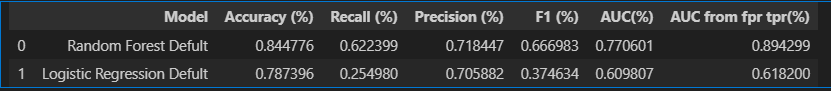

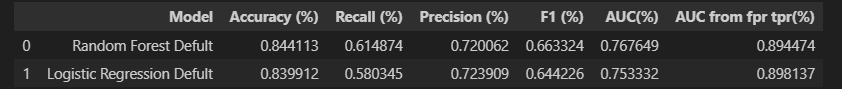

# CF

In [287]:
# Step 1: dice_ml.Data
#d = dice_ml.Data(dataframe=X_fit, continuous_features=['age', 'hours_per_week'], outcome_name='income')
d = dice_ml.Data(dataframe=X_fit2.assign(income=y_fit2), continuous_features=[ 'capital-gain','capital-loss'], outcome_name= 'income')

# Using sklearn backend
m = dice_ml.Model(model=model, backend="sklearn")

# Using method=random for generating CFs
exp = dice_ml.Dice(d, m, method="random")

In [288]:
e1 = exp.generate_counterfactuals(X_fit2[0:3], total_CFs=10, desired_class="opposite")
e1.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

Query instance (original outcome : 1)


,age,workclass,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,29,Private,114224,13,Married-civ-spouse,Husband,White,Male,0,0,40,1



Diverse Counterfactual set (new outcome: 0)


,age,workclass,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,-,-,-,4,-,-,-,-,-,-,44,0
1,-,-,-,2,Separated,-,-,-,-,-,-,0
2,83,-,-,-,Never-married,-,-,-,-,-,-,0
3,-,-,-,-,Never-married,Not-in-family,-,-,-,-,-,0
4,-,Self-emp-not-inc,-,-,-,-,-,-,-,-,19,0
5,-,-,-,-,-,-,Other,-,-,-,-,0
6,-,-,-,-,-,Not-in-family,-,Female,-,-,-,0
7,-,Self-emp-not-inc,-,-,-,-,-,-,-,-,-,0
8,-,Local-gov,-,14,-,-,-,-,-,-,-,0
9,-,-,-,-,Separated,-,Other,-,-,-,-,0


Query instance (original outcome : 0)


,age,workclass,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,28,Private,241607,9,Never-married,Not-in-family,White,Male,0,0,40,0



Diverse Counterfactual set (new outcome: 1)


,age,workclass,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,-,-,-,-,-,-,-,-,26426,-,-,1
1,-,-,-,-,-,-,-,-,55339,2640,-,1
2,-,-,-,-,-,-,-,-,50809,-,-,1
3,-,-,-,1,-,-,-,-,13278,-,-,1
4,-,-,-,-,-,-,-,-,46116,-,-,1
5,-,-,-,-,-,-,-,-,56691,-,-,1
6,-,-,-,-,Married-AF-spouse,-,-,-,67364,-,-,1
7,-,-,-,-,-,-,-,-,-,2771,94,-
8,-,-,-,-,-,-,-,-,28160,-,-,1
9,-,-,-,2,-,-,-,-,94924,-,-,1


Query instance (original outcome : 1)


,age,workclass,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,45,Self-emp-not-inc,225456,13,Married-civ-spouse,Husband,White,Male,0,0,50,1



Diverse Counterfactual set (new outcome: 0)


,age,workclass,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,-,-,-,-,-,Other-relative,Other,-,-,-,-,0
1,-,-,-,-,-,-,Asian-Pac-Islander,-,-,-,59,0
2,-,-,-,-,-,-,Other,-,-,-,64,0
3,-,-,-,-,-,-,-,-,-,-,-,0
4,-,-,-,-,Never-married,-,-,-,-,-,-,0
5,-,-,-,1,-,-,-,-,-,-,-,0
6,19,-,-,-,-,-,-,-,-,-,-,0
7,35,-,-,-,-,-,-,-,-,-,-,0
8,34,-,-,-,Married-spouse-absent,-,-,-,-,-,-,0
9,-,Local-gov,-,2,-,-,-,-,-,-,-,0


In [289]:
e1.visualize_as_dataframe(show_only_changes=False)


Query instance (original outcome : 1)


,age,workclass,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,29,Private,114224,13,Married-civ-spouse,Husband,White,Male,0,0,40,1



Diverse Counterfactual set (new outcome: 0)


,age,workclass,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,29,Private,114224,4,Married-civ-spouse,Husband,White,Male,0,0,44,0
1,29,Private,114224,2,Separated,Husband,White,Male,0,0,40,0
2,83,Private,114224,13,Never-married,Husband,White,Male,0,0,40,0
3,29,Private,114224,13,Never-married,Not-in-family,White,Male,0,0,40,0
4,29,Self-emp-not-inc,114224,13,Married-civ-spouse,Husband,White,Male,0,0,19,0
5,29,Private,219682,13,Married-civ-spouse,Husband,Other,Male,0,0,40,0
6,29,Private,114224,13,Married-civ-spouse,Not-in-family,White,Female,0,0,40,0
7,29,Self-emp-not-inc,46015,13,Married-civ-spouse,Husband,White,Male,0,0,40,0
8,29,Local-gov,114224,14,Married-civ-spouse,Husband,White,Male,0,0,40,0
9,29,Private,114224,13,Separated,Husband,Other,Male,0,0,40,0


Query instance (original outcome : 0)


,age,workclass,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,28,Private,241607,9,Never-married,Not-in-family,White,Male,0,0,40,0



Diverse Counterfactual set (new outcome: 1)


,age,workclass,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,28,Private,241607,9,Never-married,Not-in-family,White,Male,26426,0,40,1
1,28,Private,241607,9,Never-married,Not-in-family,White,Male,55339,2640,40,1
2,28,Private,241607,9,Never-married,Not-in-family,White,Male,50809,0,40,1
3,28,Private,241607,1,Never-married,Not-in-family,White,Male,13278,0,40,1
4,28,Private,241607,9,Never-married,Not-in-family,White,Male,46116,0,40,1
5,28,Private,241607,9,Never-married,Not-in-family,White,Male,56691,0,40,1
6,28,Private,241607,9,Married-AF-spouse,Not-in-family,White,Male,67364,0,40,1
7,28,Private,241607,9,Never-married,Not-in-family,White,Male,0,2771,94,0
8,28,Private,95165,9,Never-married,Not-in-family,White,Male,28160,0,40,1
9,28,Private,241607,2,Never-married,Not-in-family,White,Male,94924,0,40,1


Query instance (original outcome : 1)


,age,workclass,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,45,Self-emp-not-inc,225456,13,Married-civ-spouse,Husband,White,Male,0,0,50,1



Diverse Counterfactual set (new outcome: 0)


,age,workclass,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,45,Self-emp-not-inc,225456,13,Married-civ-spouse,Other-relative,Other,Male,0,0,50,0
1,45,Self-emp-not-inc,225456,13,Married-civ-spouse,Husband,Asian-Pac-Islander,Male,0,0,59,0
2,45,Self-emp-not-inc,225456,13,Married-civ-spouse,Husband,Other,Male,0,0,64,0
3,45,Self-emp-not-inc,144005,13,Married-civ-spouse,Husband,White,Male,0,0,50,0
4,45,Self-emp-not-inc,166258,13,Never-married,Husband,White,Male,0,0,50,0
5,45,Self-emp-not-inc,94215,1,Married-civ-spouse,Husband,White,Male,0,0,50,0
6,19,Self-emp-not-inc,225456,13,Married-civ-spouse,Husband,White,Male,0,0,50,0
7,35,Self-emp-not-inc,225456,13,Married-civ-spouse,Husband,White,Male,0,0,50,0
8,34,Self-emp-not-inc,225456,13,Married-spouse-absent,Husband,White,Male,0,0,50,0
9,45,Local-gov,225456,2,Married-civ-spouse,Husband,White,Male,0,0,50,0


In [290]:
# Changing only age and education
e2 = exp.generate_counterfactuals(X_fit2[0:1],
                                  total_CFs=5,
                                  desired_class="opposite",
                                  features_to_vary=["race", "sex", "age", "fnlwgt"]
                                  )
e2.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

Query instance (original outcome : 1)


,age,workclass,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,29,Private,114224,13,Married-civ-spouse,Husband,White,Male,0,0,40,1



Diverse Counterfactual set (new outcome: 0)


,age,workclass,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,90,-,-,-,-,-,Black,-,-,-,-,0
1,-,-,-,-,-,-,Black,-,-,-,-,0
2,-,-,-,-,-,-,-,Female,-,-,-,0
3,33,-,-,-,-,-,Other,-,-,-,-,0
4,-,-,-,-,-,-,-,-,-,-,-,0


In [ ]:
# Step 1: Define the functions for each step
def prepare_data(dataframe, continuous_features, outcome_name):
    return dice_ml.Data(dataframe=dataframe, continuous_features=continuous_features, outcome_name=outcome_name)

def initialize_model(model, backend):
    return dice_ml.Model(model=model, backend=backend)

def generate_counterfactuals(data_instance, total_CFs, desired_class, features_to_vary=None):
    d = dice_ml.Data(dataframe=data_instance.assign(income=data_instance), continuous_features=['capital-gain', 'capital-loss'], outcome_name='income')
    m = dice_ml.Model(model=model, backend="sklearn")
    exp = dice_ml.Dice(d, m, method="random")
    return exp.generate_counterfactuals(data_instance, total_CFs=total_CFs, desired_class=desired_class, features_to_vary=features_to_vary)

def visualize_counterfactuals_as_dataframe(counterfactuals, show_only_changes):
    return counterfactuals.visualize_as_dataframe(show_only_changes=show_only_changes)

# Step 2: Define the pipeline
pipeline = Pipeline([
    ('prepare_data', prepare_data),
    ('initialize_model', initialize_model),
    ('generate_counterfactuals', generate_counterfactuals),
    ('visualize_counterfactuals', visualize_counterfactuals_as_dataframe)
])

# Step 3: Use the pipeline
pipeline.fit(X_fit2, y_fit2)
pipeline.predict(X_fit2[0:3], total_CFs=10, desired_class="opposite")
pipeline.predict(X_fit2[0:1], total_CFs=5, desired_class="opposite", features_to_vary=['age' ,'education-num','capital-gain','capital-loss','hours-per-week','workclass','marital-status',  'relationship', 'sex'])


In [ ]:
query_instance = X_fit2[0:1]
imp = exp.local_feature_importance(query_instance, total_CFs=10)
print(imp.local_importance)

100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

[{'age': 0.4, 'education-num': 0.4, 'fnlwgt': 0.2, 'race': 0.2, 'marital-status': 0.1, 'relationship': 0.1, 'sex': 0.1, 'hours-per-week': 0.1, 'workclass': 0.0, 'capital-gain': 0.0, 'capital-loss': 0.0}]


In [ ]:
query_instances = X_fit2[0:20]
imp = exp.global_feature_importance(query_instances)
print(imp.summary_importance)

100%|██████████| 20/20 [00:07<00:00,  2.66it/s]

{'capital-gain': 0.615, 'hours-per-week': 0.165, 'education-num': 0.155, 'relationship': 0.14, 'capital-loss': 0.135, 'fnlwgt': 0.125, 'age': 0.12, 'workclass': 0.095, 'sex': 0.08, 'marital-status': 0.07, 'race': 0.06}
